In [2]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [3]:
#loading data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
Y_train[0]

5

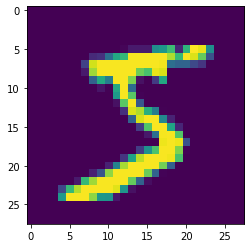

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [7]:
#reshaping dataset

X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [8]:
#onehot encoding

number_of_classes = 10
Y_train = np_utils.to_categorical(Y_train,number_of_classes)
Y_test = np_utils.to_categorical(Y_test,number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#Creating Model

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
#Model fit

model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 168s 89ms/step - loss: 0.2385 - accuracy: 0.9525 - val_loss: 0.0803 - val_accuracy: 0.9753
Epoch 2/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.0822 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0807 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0889 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.1012 - val_accuracy: 0.9783


In [13]:
#Observing metrics

metrics = model.evaluate(X_test,Y_test,verbose=0)
print("Accuracy : ",metrics)

Accuracy :  [0.10118725895881653, 0.9782999753952026]


In [14]:
#Predicting Output

prediction = model.predict(X_test[:4])
print("Prediction : ",prediction)

Prediction :  [[6.1009073e-14 5.8489743e-21 6.4244809e-09 3.3027723e-07 7.2071342e-21
  3.2559725e-17 4.3606907e-20 9.9999964e-01 1.8921597e-13 9.4664221e-11]
 [2.6476574e-14 1.1038348e-13 1.0000000e+00 9.0897985e-16 1.9807459e-19
  2.0456942e-21 8.9307502e-12 2.2407053e-20 4.4203584e-16 3.8092762e-25]
 [4.4776787e-09 9.9999809e-01 1.3025048e-07 1.4236751e-10 1.3495306e-06
  3.6368863e-08 7.1740003e-10 2.1688162e-11 5.0477979e-07 2.8165634e-10]
 [1.0000000e+00 2.5703366e-18 3.0907323e-12 3.2114182e-17 3.2292926e-13
  2.6055157e-14 3.7046211e-09 1.5695582e-15 1.8205797e-12 5.3504947e-11]]


In [15]:
print(np.argmax(prediction,axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
#Observing Metrics

metrics = model.evaluate(X_test,Y_test,verbose=0)
print("Metrics : ",metrics)

Metrics :  [0.10118725895881653, 0.9782999753952026]


In [18]:
#Saving the model

model.save("models/mnistCNN.h5")

Taking image as input to check results

In [20]:
!tar -zcvf digit-recognition.tar models/mnistCNN.h5

models/mnistCNN.h5


In [23]:
ls -1

digit-recognition.tar
models/


In [24]:
!pip install ibm_watson_machine_learning
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 17.2 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"xBBpnC_Z6QzUmGIhuTBWd4Ls3fRy-N3mPl8sAenOomY0"
}
client = APIClient(credentials)
client

In [28]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/b6afebf3b78c4c51805f640d4dc3e75d:d622a448-eafb-4e69-af17-c682f43827fc::',
      'guid': 'd622a448-eafb-4e69-af17-c682f43827fc',
      'name': 'Watson Machine Learning-fl',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digit recognition',
    'scope': {'bss_account_id': 'b6afebf3b78c4c51805f640d4dc3e75d'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '041d6916-d227-48d0-8926-71c57b13d96e',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '47294b34eb7c4a1e88cbb4551f8f31ee',
        'api_key': 'BOZ5sOOeGb30rwDmm4o5-TeQQfIdJVp-7ejSTY6B59p9',
        'secret_access_key': '47ceb44564e1f42b3c2b23da5946113743d9d42c4c4df603',
        'service_id': 'ServiceId-8d1b6748-a657-4d36-9620-02604dc8440c'},
       'editor': {'access_key_id': '85e3020d4b064d9f9748b7d4279fc2ec',
        'ap

In [29]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [32]:
space_uid = guid_space_name(client,'digit recognition')
space_uid

'6cbe2bb4-0c2a-4070-8bb4-cdf67022ca6b'

In [33]:
client.set.default_space(space_uid)

'SUCCESS'

In [34]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [35]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [36]:
model_details = client.repository.store_model(model='digit-recognition.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model repo",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [37]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-17T07:32:15.206Z',
  'id': 'dfdc3aca-829b-46a9-9099-0dcc1821d621',
  'modified_at': '2022-11-17T07:32:18.001Z',
  'name': 'CNN Digit recognition model repo',
  'owner': 'IBMid-6640043AQ0',
  'resource_key': 'c7dfcb35-db16-4177-b17f-437a9a3a0d95',
  'space_id': '6cbe2bb4-0c2a-4070-8bb4-cdf67022ca6b'},
 'system': {'warnings': []}}

In [40]:
model_id = client.repository.get_model_id(model_details)
model_id

'dfdc3aca-829b-46a9-9099-0dcc1821d621'

In [ ]:
client.repository.download(model_id,'DigitRecog_IBMmodel.tar.gz')